<a href="https://colab.research.google.com/github/ripandeep1750/code/blob/main/nyt_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [ ]:
# Libaries import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/structural virality/dataset/nytpopular.csv")
data.head(n=4)

,id,retweet_count,reply_count,like_count,url,date,bag_of_phrases
0,1512064169222287361,723,168,2974,https://nyti.ms/3KkLZrK,2022-04-07 09:46:05-04:00,"['$', '42', '46', 'accord', 'aim', 'antiquity'..."
1,1488331283226894340,42,16,139,https://nyti.ms/3rfxPAS,2022-01-31 21:00:04-05:00,"['2003', '2015', '2018', '2030', '20_percent',..."
2,1510781717744914441,24,16,245,https://nyti.ms/3NKR4Mc,2022-04-03 20:50:05-04:00,"['2020', '6', '6_2021', 'adjust', 'album', 'an..."
3,1483514600406540288,56,22,237,https://nyti.ms/3IhrsTk,2022-01-18 14:00:17-05:00,"[' ', '$', '$_1.2', '$_1.4', '$_1.5', '$_1.6',..."


In [ ]:
data.drop(labels=['url', 'date', 'bag_of_phrases'], axis = 1, inplace=True)
data.head(n=4)
original_data = copy(data)

In [ ]:
data.describe()

,id,retweet_count,reply_count,like_count
count,9.100000e+03,9100.000000,9100.000000,9100.000000
mean,1.496276e+18,204.552418,92.086264,834.303956
std,1.085665e+16,653.673622,240.699649,2686.369570
min,1.477067e+18,0.000000,0.000000,0.000000
25%,1.487142e+18,38.000000,21.000000,159.000000
50%,1.496230e+18,72.000000,39.000000,285.000000
75%,1.505626e+18,157.000000,82.000000,627.000000
max,1.515445e+18,20463.000000,8473.000000,116847.000000


In [ ]:
like_data = np.sort(data['like_count'].values)
print(like_data.shape)
leng = like_data.shape[0]

middle = like_data[int(leng*0.5)-1]
middle

(9100,)


285

In [ ]:
like_label = list()
for like in data['like_count']:
    if like <= 285:
        like_label.append('Unpopular')
    else:
        like_label.append('Popular')

# Update this class label into the dataframe
data = pd.concat([data.reset_index(drop=True), pd.DataFrame(like_label, columns=['popularity'])], axis=1)
data.head(4)

,id,retweet_count,reply_count,like_count,popularity
0,1512064169222287361,723,168,2974,Popular
1,1488331283226894340,42,16,139,Unpopular
2,1510781717744914441,24,16,245,Unpopular
3,1483514600406540288,56,22,237,Unpopular


,popularity,No of articles
0,Popular,4547
1,Unpopular,4553


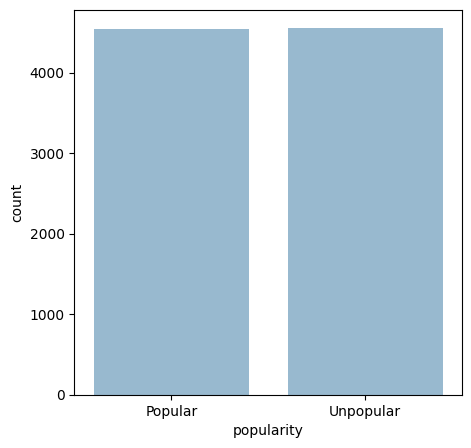

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(x='popularity',data=data,alpha=0.5)
data_channel_data = data.groupby('popularity').size().reset_index()
data_channel_data.columns = ['popularity','No of articles']
data_channel_data

Skewness: 18.154914
Kurtosis: 545.682417


<ipython-input-52-7d037dd9eee3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['like_count'], fit=norm);


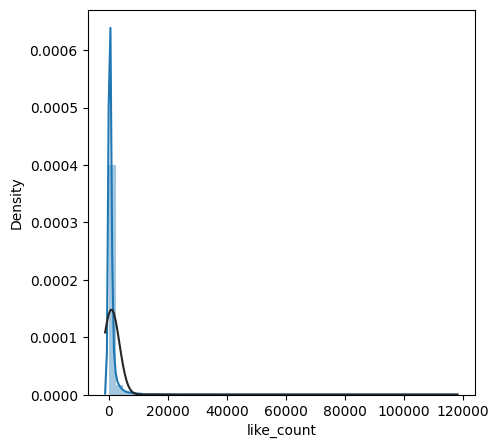

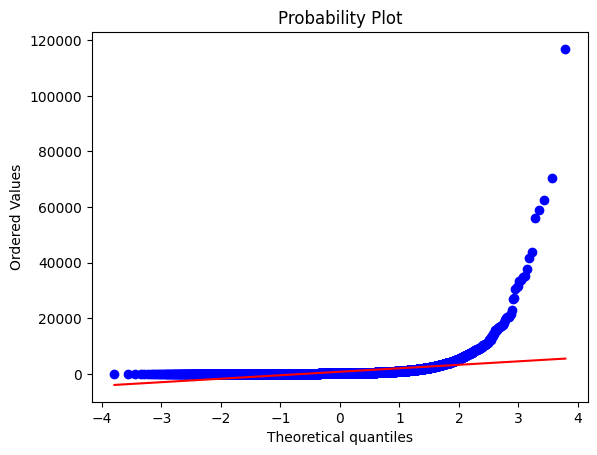

In [ ]:
print("Skewness: %f" % data['like_count'].skew())
print("Kurtosis: %f" % data['like_count'].kurt())
from scipy.stats import norm, probplot

#histogram and normal probability plot
temp_data = data[data['like_count'] <= 100000]
fig,ax = plt.subplots(figsize=(5,5))
sns.distplot(data['like_count'], fit=norm);
fig = plt.figure()
res = probplot(data['like_count'], plot=plt)

<ipython-input-53-7dbe058b5e2a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_like_log, fit=norm);


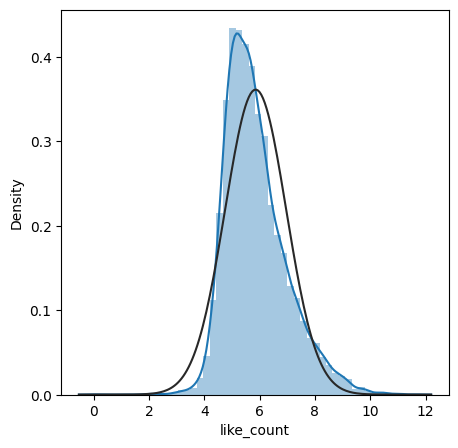

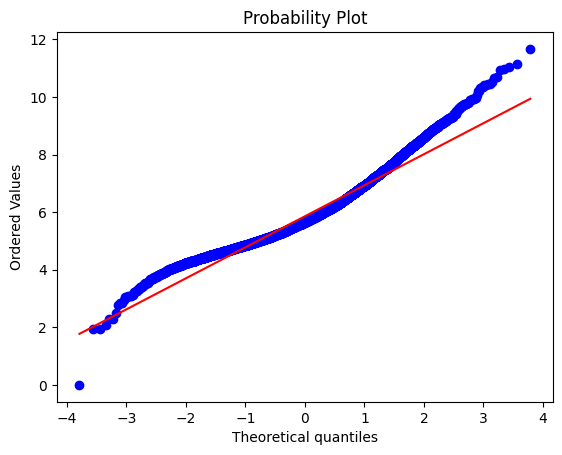

In [ ]:
#applying log transformation
new_like_data = copy(data)

new_like_data.loc[new_like_data['like_count'] > 0, 'like_count'] = np.log(data.loc[data['like_count'] > 0, 'like_count'])
new_like_log = new_like_data['like_count']
#transformed histogram and normal probability plot
fig,ax = plt.subplots(figsize=(5,5))
sns.distplot(new_like_log, fit=norm);
fig = plt.figure()
res = probplot(new_like_log, plot=plt)

In [ ]:
# use log transformation to transform each features to a normal distribution

# note log transformation can only be performed on data without zero value
for col in data.iloc[:,:-1].columns:
    #applying log transformation
    temp = data[data[col] == 0]
    # only apply to non-zero features
    if temp.shape[0] == 0:
        data[col] = np.log(data[col])
        print (col)

id


<ipython-input-55-5caaaac88614>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data['id'], fit=norm);


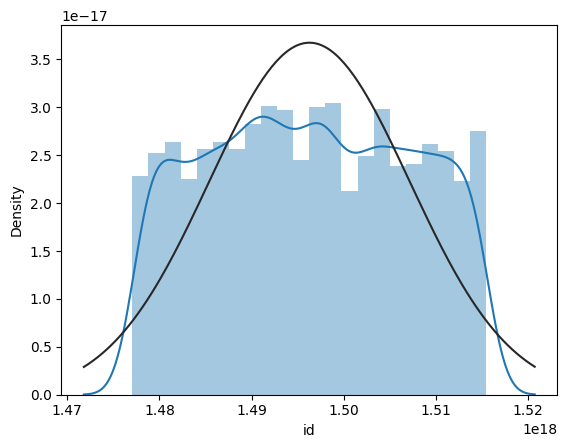

In [ ]:
# before log transformation
sns.distplot(original_data['id'], fit=norm);

<ipython-input-56-e311674dbc98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['id'], fit=norm);


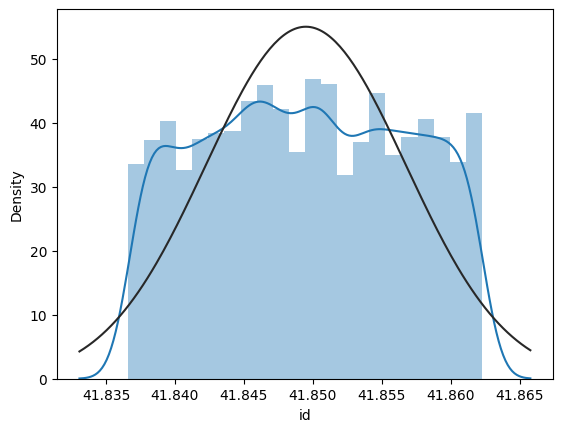

In [ ]:
# after log transformation
sns.distplot(data['id'], fit=norm);

In [ ]:
# Scale features using statistics that are robust to outliers.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# scalled all the feature selections aside shares and populairty
scalled_data = scaler.fit_transform(data.iloc[:, :-2])

# update the dataframe back with the scalled data
data.iloc[:, :-2] = scalled_data

In [ ]:
# the data after log transformation and robust scaler
data.describe()

,id,retweet_count,reply_count,like_count
count,9100.000000,9100.000000,9100.000000,9100.000000
mean,0.000349,1.113886,0.870267,834.303956
std,0.587366,5.493056,3.945896,2686.369570
min,-1.043523,-0.605042,-0.639344,0.000000
25%,-0.493228,-0.285714,-0.295082,159.000000
50%,0.000000,0.000000,0.000000,285.000000
75%,0.506772,0.714286,0.704918,627.000000
max,1.032993,171.352941,138.262295,116847.000000


In [ ]:
data.iloc[:,:-2]

,id,retweet_count,reply_count
0,0.852194,5.470588,2.114754
1,-0.428509,-0.252101,-0.377049
2,0.783504,-0.403361,-0.377049
3,-0.690924,-0.134454,-0.278689
4,-0.891583,-0.084034,-0.049180
...,...,...,...
9095,0.347348,0.159664,0.409836
9096,-0.988098,-0.084034,-0.295082
9097,0.484940,0.495798,0.688525
9098,-0.124244,-0.361345,0.622951


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
# Kmeans perform poorly on high feature space
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.iloc[:,:-2])
reduced_data.shape

(9100, 2)

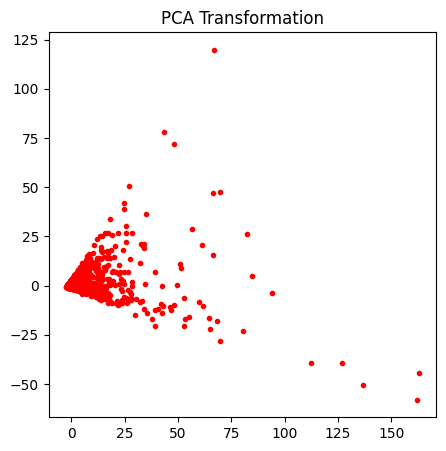

In [ ]:
# plotting the clusters PCA
plt.figure(figsize=(5,5))
plt.plot(reduced_data[:,0], reduced_data[:,1], 'r.')
plt.title('PCA Transformation')

plt.show()

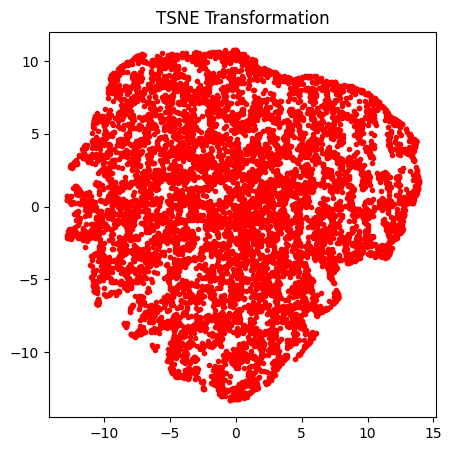

In [ ]:
tsne = TSNE(n_components=2, n_iter=300)
reduced_tsne = tsne.fit_transform(data.iloc[:,:-2])

# plotting the clusters TSNE
plt.figure(figsize=(5,5))
plt.plot(reduced_tsne[:,0], reduced_tsne[:,1], 'r.')
plt.title('TSNE Transformation')
plt.show()

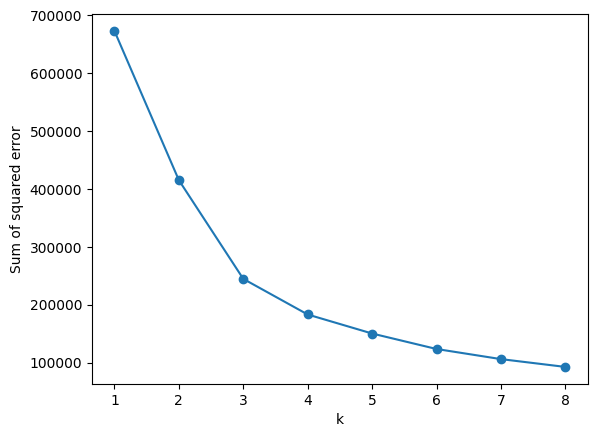

In [ ]:
k=list(range(1,9))
ssd=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(reduced_tsne)
    ssd.append(kmeans.inertia_)

plt.plot(k,ssd,'o-')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.show()

In [ ]:
# Predicts the clusters
kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(reduced_tsne)
kmeans_preds=kmeans.predict(reduced_tsne)

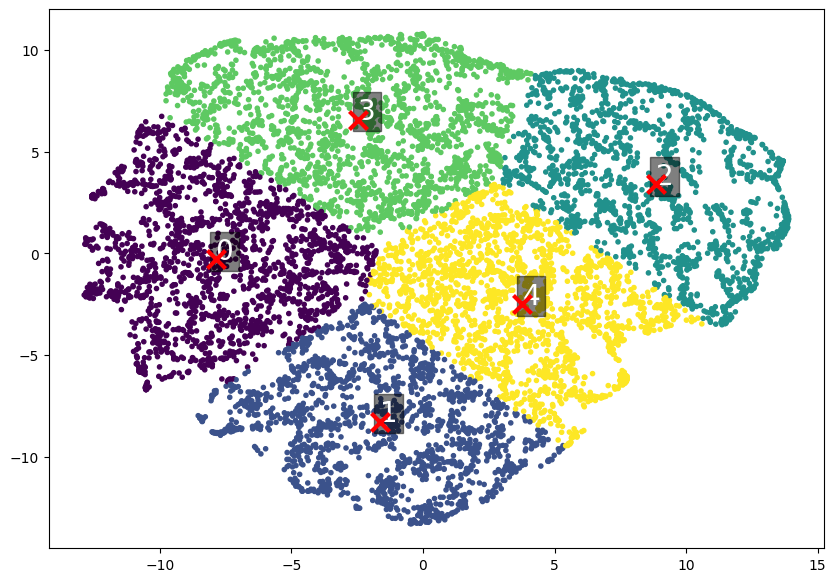

In [ ]:
centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,7))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white',
             bbox=dict(facecolor='black', alpha=0.5))

plt.scatter(reduced_tsne[:,0],reduced_tsne[:,1],c=kmeans_preds,marker='.')
plt.show()

In [ ]:
# fussing the cluster data into the dataframe
data1=pd.concat([data.reset_index(drop=True), pd.DataFrame(kmeans_preds, columns=['clusters'])],axis=1)

In [ ]:
data1.shape

(9100, 6)

In [ ]:
# extrating individual cluster from the data
cluster1_data = data1[data1['clusters'] == 0]
cluster2_data = data1[data1['clusters'] == 1]
cluster3_data = data1[data1['clusters'] == 2]
cluster4_data = data1[data1['clusters'] == 3]
cluster5_data = data1[data1['clusters'] == 4]
print ('Cluster1 size: ',cluster1_data.shape)
print ('Cluster2 size: ',cluster2_data.shape)
print ('Cluster3 size: ',cluster3_data.shape)
print ('Cluster4 size: ',cluster4_data.shape)
print ('Cluster5 size: ',cluster5_data.shape)

Cluster1 size:  (1855, 6)
Cluster2 size:  (1671, 6)
Cluster3 size:  (1700, 6)
Cluster4 size:  (1992, 6)
Cluster5 size:  (1882, 6)


In [ ]:
# Mutual Information computation
# our label is the popularity and will be disregarding the shares data
from sklearn.feature_selection import mutual_info_classif

# Mutual information for cluster 1
X1 = cluster1_data.iloc[:, :-3]
y1 = cluster1_data.iloc[:, -2]
mi_data_clus1 = mutual_info_classif(X1, y1)

In [ ]:
# mututal information for cluster 2
X2 = cluster2_data.iloc[:, :-3]
y2 = cluster2_data.iloc[:, -2]
mi_data_clus2 = mutual_info_classif(X2, y2)

In [ ]:
# mututal information for cluster 3
X3 = cluster3_data.iloc[:, :-3]
y3 = cluster3_data.iloc[:, -2]
mi_data_clus3 = mutual_info_classif(X3, y3)
# mututal information for cluster 4
X4 = cluster4_data.iloc[:, :-3]
y4 = cluster4_data.iloc[:, -2]
mi_data_clus4 = mutual_info_classif(X4, y4)
# mututal information for cluster 5
X5 = cluster5_data.iloc[:, :-3]
y5 = cluster5_data.iloc[:, -2]
mi_data_clus5 = mutual_info_classif(X5, y5)

<ipython-input-76-ccc2d9eff604>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 1')

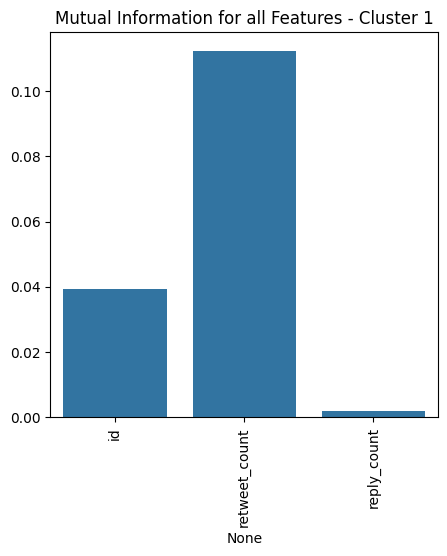

In [ ]:
# ploting the result of mutual information
plt.figure(figsize=(5, 5))
g = sns.barplot(x=X1.columns,y=mi_data_clus1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 1")

<ipython-input-77-64f51b637a3c>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 2')

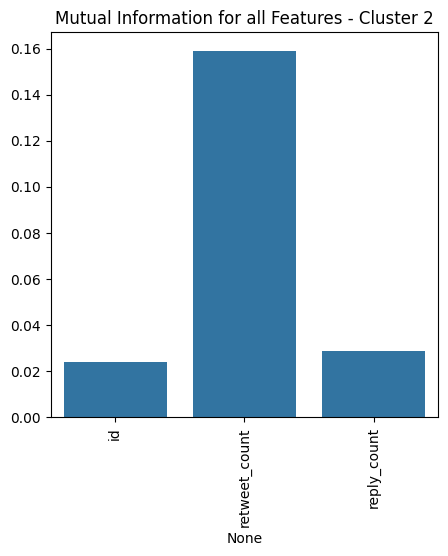

In [ ]:
plt.figure(figsize=(5, 5))
g = sns.barplot(x=X2.columns,y=mi_data_clus2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 2")

<ipython-input-78-3dd38460ee61>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 3')

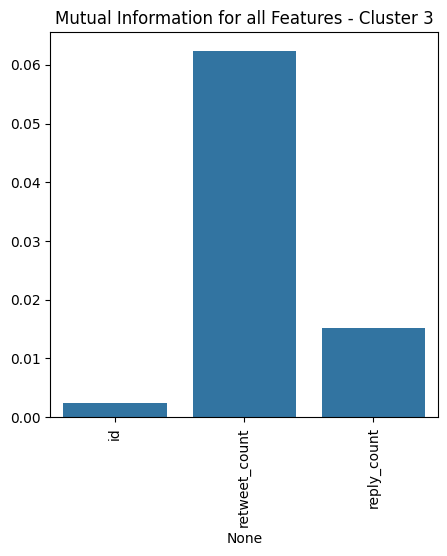

In [ ]:
plt.figure(figsize=(5, 5))
g = sns.barplot(x=X3.columns,y=mi_data_clus3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 3")

<ipython-input-79-a545e92d4f75>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 4')

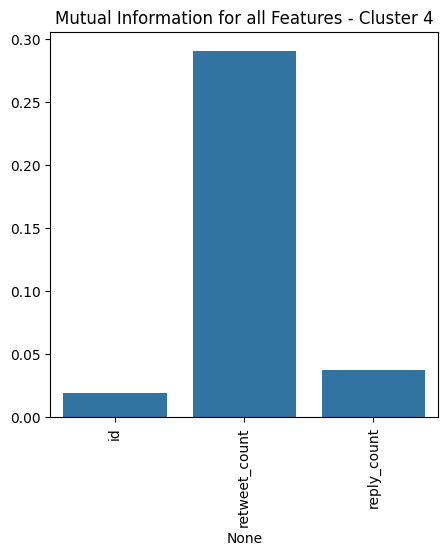

In [ ]:
plt.figure(figsize=(5, 5))
g = sns.barplot(x=X4.columns,y=mi_data_clus4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 4")

<ipython-input-81-8315653ac533>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 5')

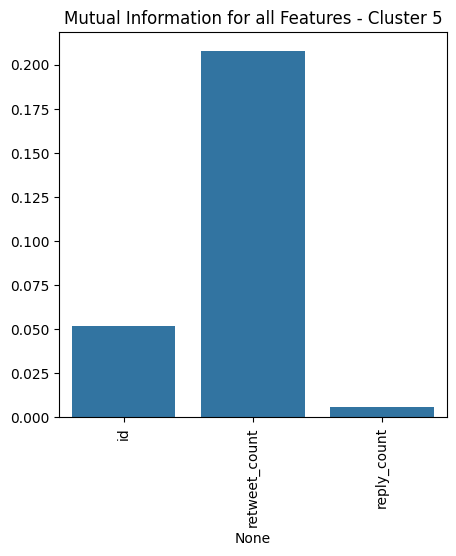

In [ ]:
plt.figure(figsize=(5, 5))
g = sns.barplot(x=X5.columns,y=mi_data_clus5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 5")

In [ ]:
### an helper function for extracting the best features possible
def extract_best_features(feature_scores, feature_col, n=5, sort_metric=False):
    # this function extracts out the best features.
    # inputs
    temp = np.hstack((feature_scores.reshape(-1,1), feature_col.reshape(-1,1)))
    features = pd.DataFrame(temp, columns=['score', 'name'])
    # sort the features
    features = features.sort_values(by=['score'], ascending=sort_metric).reset_index(drop=True)
    # extract the best features
    best_features = features.iloc[:n, :].to_numpy()
    return best_features

In [ ]:
best_features = extract_best_features(mi_data_clus4, X4.columns.values, n=10)
best_features

array([[0.29104507262648416, 'retweet_count'],
       [0.03751143011946212, 'reply_count'],
       [0.019394038205097663, 'id']], dtype=object)

In [ ]:
from sklearn.feature_selection import f_classif

<ipython-input-85-df534f7f4af4>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'F score for all Features - Cluster 1')

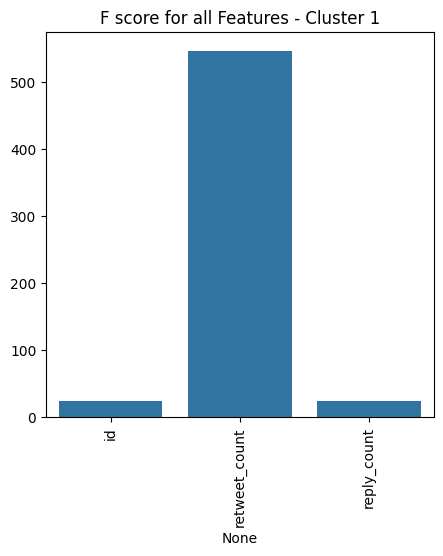

In [ ]:
# F-Score for cluster 1

f_test_data = f_classif(X1, y1)
f_score_1=f_test_data[0]

plt.figure(figsize=(5, 5))
g = sns.barplot(x=X1.columns,y=f_score_1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 1")

<ipython-input-86-03ef729ed76a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'F score for all Features - Cluster 2')

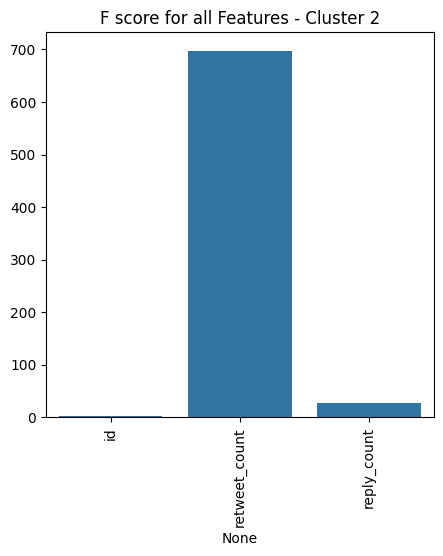

In [ ]:
# F-Score for cluster 2
f_test_data = f_classif(X2, y2)
f_score_2=f_test_data[0]

plt.figure(figsize=(5, 5))
g = sns.barplot(x=X2.columns,y=f_score_2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 2")

<ipython-input-87-602edfca3864>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'F score for all Features - Cluster 3')

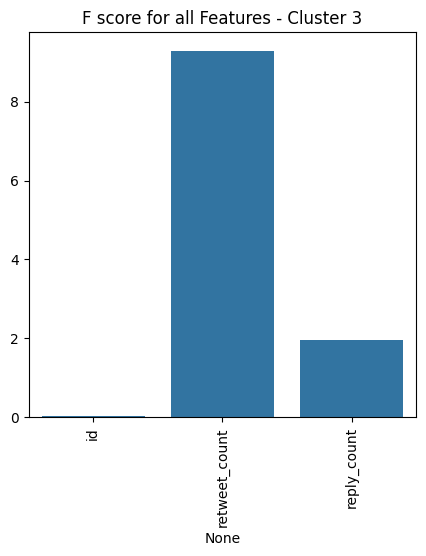

In [ ]:
# F-Score for cluster 3
f_test_data = f_classif(X3, y3)
f_score_3=f_test_data[0]

plt.figure(figsize=(5, 5))
g = sns.barplot(x=X3.columns,y=f_score_3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 3")

In [ ]:
# F-Score for cluster 4
f_test_data = f_classif(X4, y4)
f_score_4=f_test_data[0]

# F-Score for cluster 5
f_test_data = f_classif(X5, y5)
f_score_5=f_test_data[0]

<ipython-input-89-861035bdd88c>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'F score for all Features - Cluster 4')

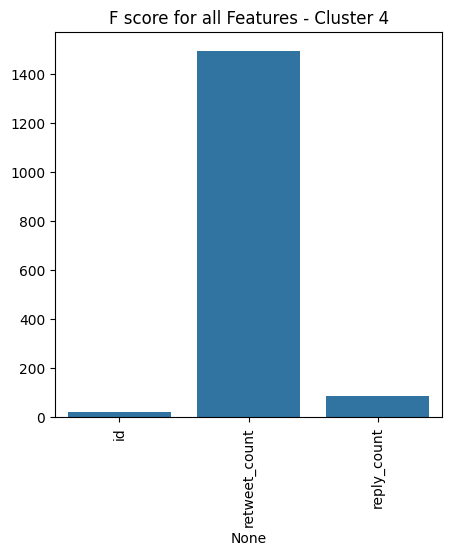

In [ ]:
plt.figure(figsize=(5, 5))
g = sns.barplot(x=X4.columns,y=f_score_4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 4")

<ipython-input-90-2e7a638deab8>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'F score for all Features - Cluster 5')

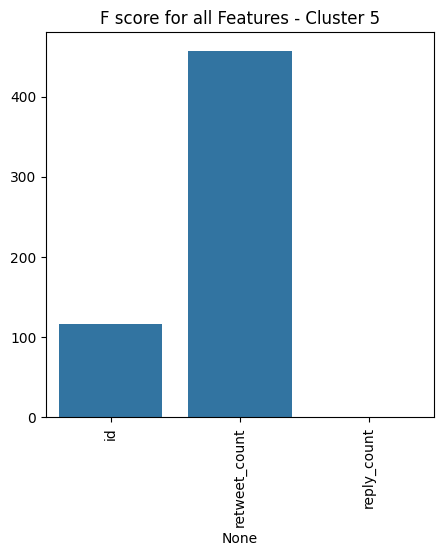

In [ ]:
plt.figure(figsize=(5, 5))
g = sns.barplot(x=X4.columns,y=f_score_5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 5")

In [ ]:
best_features = extract_best_features(f_score_1, X1.columns.values, n=10)
best_features

array([[547.4547223436997, 'retweet_count'],
       [24.2234744500411, 'id'],
       [23.72899960624522, 'reply_count']], dtype=object)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random forest is used as the model for RFE
# RFE for Cluster 1
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10)
# for 1 features
rfe = RFE(estimator=model, n_features_to_select=1)
rfe = rfe.fit(X1, y1)
rfe_1_features_clus1 = X1.columns.values[rfe.get_support()]
# for 2 features
rfe = RFE(estimator=model, n_features_to_select=2)
rfe = rfe.fit(X1, y1)
rfe_2_features_clus1 = X1.columns.values[rfe.get_support()]
# for 3 features
rfe = RFE(estimator=model, n_features_to_select= 3)
rfe = rfe.fit(X1, y1)
rfe_3_features_clus1  = X1.columns.values[rfe.get_support()]

In [ ]:
# Random forest is used as the model for RFE
# RFE for Cluster 2
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10)
# for 1 features
rfe = RFE(estimator=model, n_features_to_select=  1)
rfe = rfe.fit(X2, y2)
rfe_1_features_clus2 = X2.columns.values[rfe.get_support()]
# for 2 features
rfe = RFE(estimator=model, n_features_to_select=  2)
rfe = rfe.fit(X2, y2)
rfe_2_features_clus2 = X2.columns.values[rfe.get_support()]
# for 3 features
rfe = RFE(estimator=model, n_features_to_select=  3)
rfe = rfe.fit(X2, y2)
rfe_3_features_clus2  = X2.columns.values[rfe.get_support()]

In [ ]:
# Random forest is used as the model for RFE
# RFE for Cluster 3
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10)
# for 1 features
rfe = RFE(estimator=model, n_features_to_select=1)
rfe = rfe.fit(X3, y3)
rfe_1_features_clus3 = X3.columns.values[rfe.get_support()]
# for 2 features
rfe = RFE(estimator=model, n_features_to_select= 2)
rfe = rfe.fit(X3, y3)
rfe_2_features_clus3 = X3.columns.values[rfe.get_support()]
# for 3 features
rfe = RFE(estimator=model, n_features_to_select= 3)
rfe = rfe.fit(X3, y3)
rfe_3_features_clus3  = X3.columns.values[rfe.get_support()]

In [ ]:
# Random forest is used as the model for RFE
# RFE for Cluster 4
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10)
# for 1 features
rfe = RFE(estimator=model, n_features_to_select=  1)
rfe = rfe.fit(X4, y4)
rfe_1_features_clus4 = X4.columns.values[rfe.get_support()]
# for 2 features
rfe = RFE(estimator=model, n_features_to_select=  2)
rfe = rfe.fit(X4, y4)
rfe_2_features_clus4 = X4.columns.values[rfe.get_support()]
# for 3 features
rfe = RFE(estimator=model, n_features_to_select=  3)
rfe = rfe.fit(X4, y4)
rfe_3_features_clus4  = X4.columns.values[rfe.get_support()]

In [ ]:
# Random forest is used as the model for RFE
# RFE for Cluster 5
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10)
# for 1 features
rfe = RFE(estimator=model, n_features_to_select= 1)
rfe = rfe.fit(X5, y5)
rfe_1_features_clus5 = X5.columns.values[rfe.get_support()]
# for 2 features
rfe = RFE(estimator=model, n_features_to_select= 2)
rfe = rfe.fit(X5, y5)
rfe_2_features_clus5 = X5.columns.values[rfe.get_support()]
# for 3 features
rfe = RFE(estimator=model, n_features_to_select= 3)
rfe = rfe.fit(X5, y5)
rfe_3_features_clus5  = X5.columns.values[rfe.get_support()]

<ipython-input-132-e0f2a6012f01>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


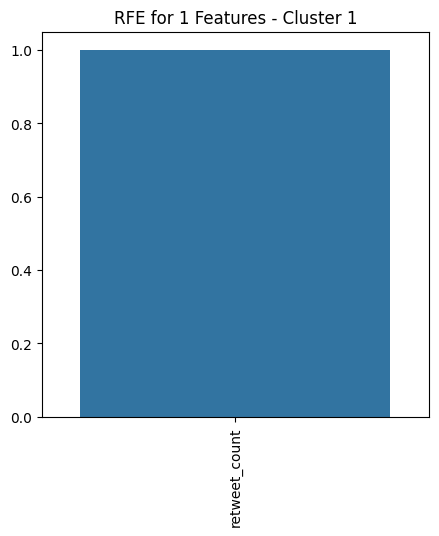

<ipython-input-132-e0f2a6012f01>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


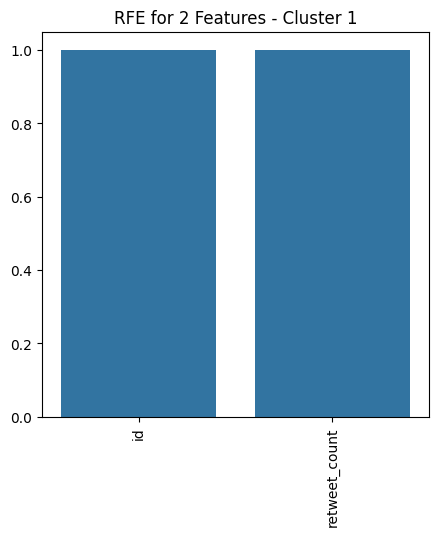

<ipython-input-132-e0f2a6012f01>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


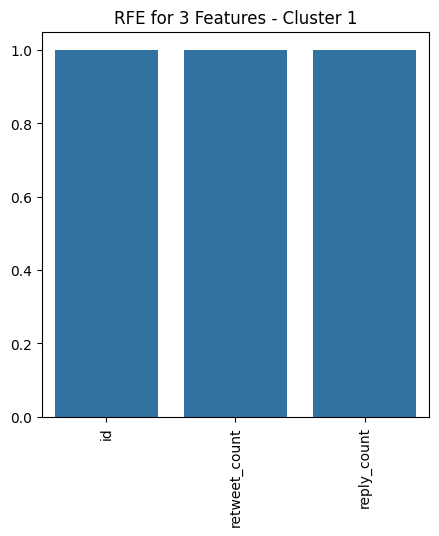

In [ ]:
# Plot the result of RFE for 1 features - Cluster 1
plt.figure(figsize=(5, 5))
g = sns.barplot(x=rfe_1_features_clus1, y=[1] * len(rfe_1_features_clus1))
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("RFE for 1 Features - Cluster 1")
plt.show()

# Plot the result of RFE for 2 features - Cluster 1
plt.figure(figsize=(5, 5))
g = sns.barplot(x=rfe_2_features_clus1, y=[1] * len(rfe_2_features_clus1))
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("RFE for 2 Features - Cluster 1")
plt.show()

# Plot the result of RFE for 3 features - Cluster 1
plt.figure(figsize=(5, 5))
g = sns.barplot(x=rfe_3_features_clus1, y=[1] * len(rfe_3_features_clus1))
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("RFE for 3 Features - Cluster 1")
plt.show()


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#########################################################
# PCA for cluster 1
# for 1 features
transformer = PCA(n_components=1)
pca_clus1_1 = transformer.fit_transform(X1)
# for 2 features
transformer = PCA(n_components=2)
pca_clus1_2 = transformer.fit_transform(X1)
# for 3 features
transformer = PCA(n_components=3)
pca_clus1_3 = transformer.fit_transform(X1)

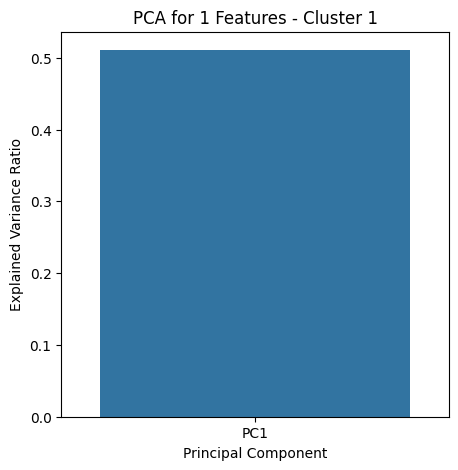

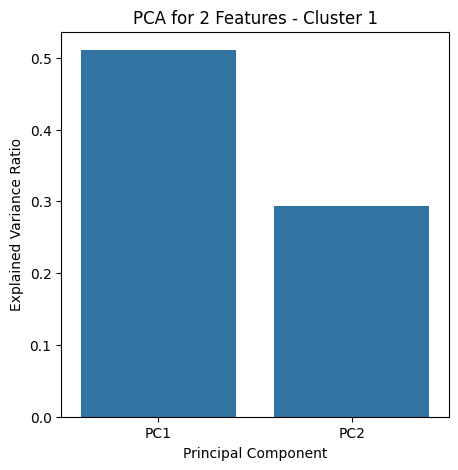

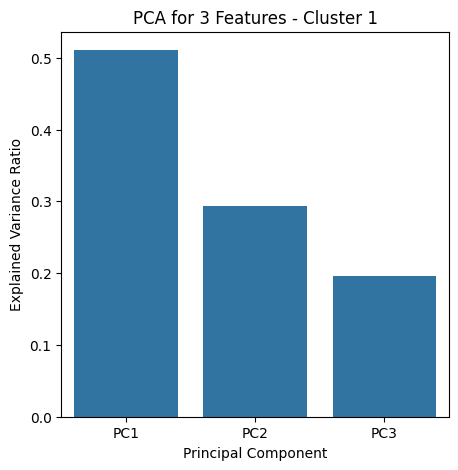

In [ ]:
# ploting the result of PCA
num_components = [1, 2, 3]

# Perform PCA and visualize the results
for n in num_components:
    # Perform PCA
    transformer = PCA(n_components=n)
    pca_result = transformer.fit_transform(X1)

    # Create a dataframe with PCA results
    pca_results_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n)])

    # Plot the explained variance ratio
    plt.figure(figsize=(5, 5))
    sns.barplot(x=pca_results_df.columns, y=transformer.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'PCA for {n} Features - Cluster 1')
    plt.show()

In [ ]:
# PCA for cluster 2
# for 1 features
transformer = PCA(n_components=1)
pca_clus2_1 = transformer.fit_transform(X2)
# for 2 features
transformer = PCA(n_components=2)
pca_clus2_2 = transformer.fit_transform(X2)
# for 3 features
transformer = PCA(n_components=3)
pca_clus2_3 = transformer.fit_transform(X2)

In [ ]:
# PCA for cluster 3
# for 1 features
transformer = PCA(n_components=1)
pca_clus3_1 = transformer.fit_transform(X3)
# for 2 features
transformer = PCA(n_components=2)
pca_clus3_2 = transformer.fit_transform(X3)
# for 3 features
transformer = PCA(n_components=3)
pca_clus3_3 = transformer.fit_transform(X3)

In [ ]:
# PCA for cluster 4
# for 1 features
transformer = PCA(n_components=1)
pca_clus4_1 = transformer.fit_transform(X4)
# for 2 features
transformer = PCA(n_components=2)
pca_clus4_2 = transformer.fit_transform(X4)
# for 3 features
transformer = PCA(n_components=3)
pca_clus4_3 = transformer.fit_transform(X4)

In [ ]:
# PCA for cluster 5
# for 1 features
transformer = PCA(n_components=1)
pca_clus5_1 = transformer.fit_transform(X5)
# for 2 features
transformer = PCA(n_components=2)
pca_clus5_2 = transformer.fit_transform(X5)
# for 3 features
transformer = PCA(n_components=3)
pca_clus5_3 = transformer.fit_transform(X5)

In [ ]:
# encoding the label set with a label encoder
from sklearn.preprocessing import LabelEncoder

labelEn = LabelEncoder()
encoded_labels = labelEn.fit_transform(y1.values)
class_names = labelEn.classes_
class_names

array(['Popular', 'Unpopular'], dtype=object)

In [ ]:
# Splitting the data for Training and Testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import recall_score

In [ ]:
#Modified(table)
# Initialize an empty nested list to store accuracy values
accuracy_table = []

# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)
features_list = ['1 Features', '2 Features', '3 Features']
# n_features = [5, 10, 20, 30]
pca_data = [pca_clus1_1, pca_clus1_2, pca_clus1_3]
cluster1_accuracy = []  # Accuracy values for Cluster 1

for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster1_accuracy.append(accuracy)

accuracy_table.append(cluster1_accuracy)

# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)
pca_data = [pca_clus2_1, pca_clus2_2, pca_clus2_3]
cluster2_accuracy = []  # Accuracy values for Cluster 2

for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster2_accuracy.append(accuracy)

accuracy_table.append(cluster2_accuracy)

# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
pca_data = [pca_clus3_1, pca_clus3_2, pca_clus3_3]
cluster3_accuracy = []  # Accuracy values for Cluster 3

for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster3_accuracy.append(accuracy)

accuracy_table.append(cluster3_accuracy)

# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
pca_data = [pca_clus4_1, pca_clus4_2, pca_clus4_3]
cluster4_accuracy = []  # Accuracy values for Cluster 4

for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster4_accuracy.append(accuracy)

accuracy_table.append(cluster4_accuracy)

# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
pca_data = [pca_clus5_1, pca_clus5_2, pca_clus5_3]
cluster5_accuracy = []  # Accuracy values for Cluster 5
for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster5_accuracy.append(accuracy)

accuracy_table.append(cluster5_accuracy)
# Print the accuracy table in tabular format
print("KNN (PCA) \t1 Features\t2 Features\t3 Features")
for i in range(len(accuracy_table)):
    print(f"Cluster {i+1}\t{accuracy_table[i][0]:.2f}%\t\t{accuracy_table[i][1]:.2f}%\t\t{accuracy_table[i][2]:.2f}")

KNN (PCA) 	1 Features	2 Features	3 Features
Cluster 1	87.97%		87.97%		89.23
Cluster 2	83.27%		82.07%		86.45
Cluster 3	97.25%		97.25%		97.25
Cluster 4	65.05%		80.27%		79.43
Cluster 5	86.37%		86.37%		86.73


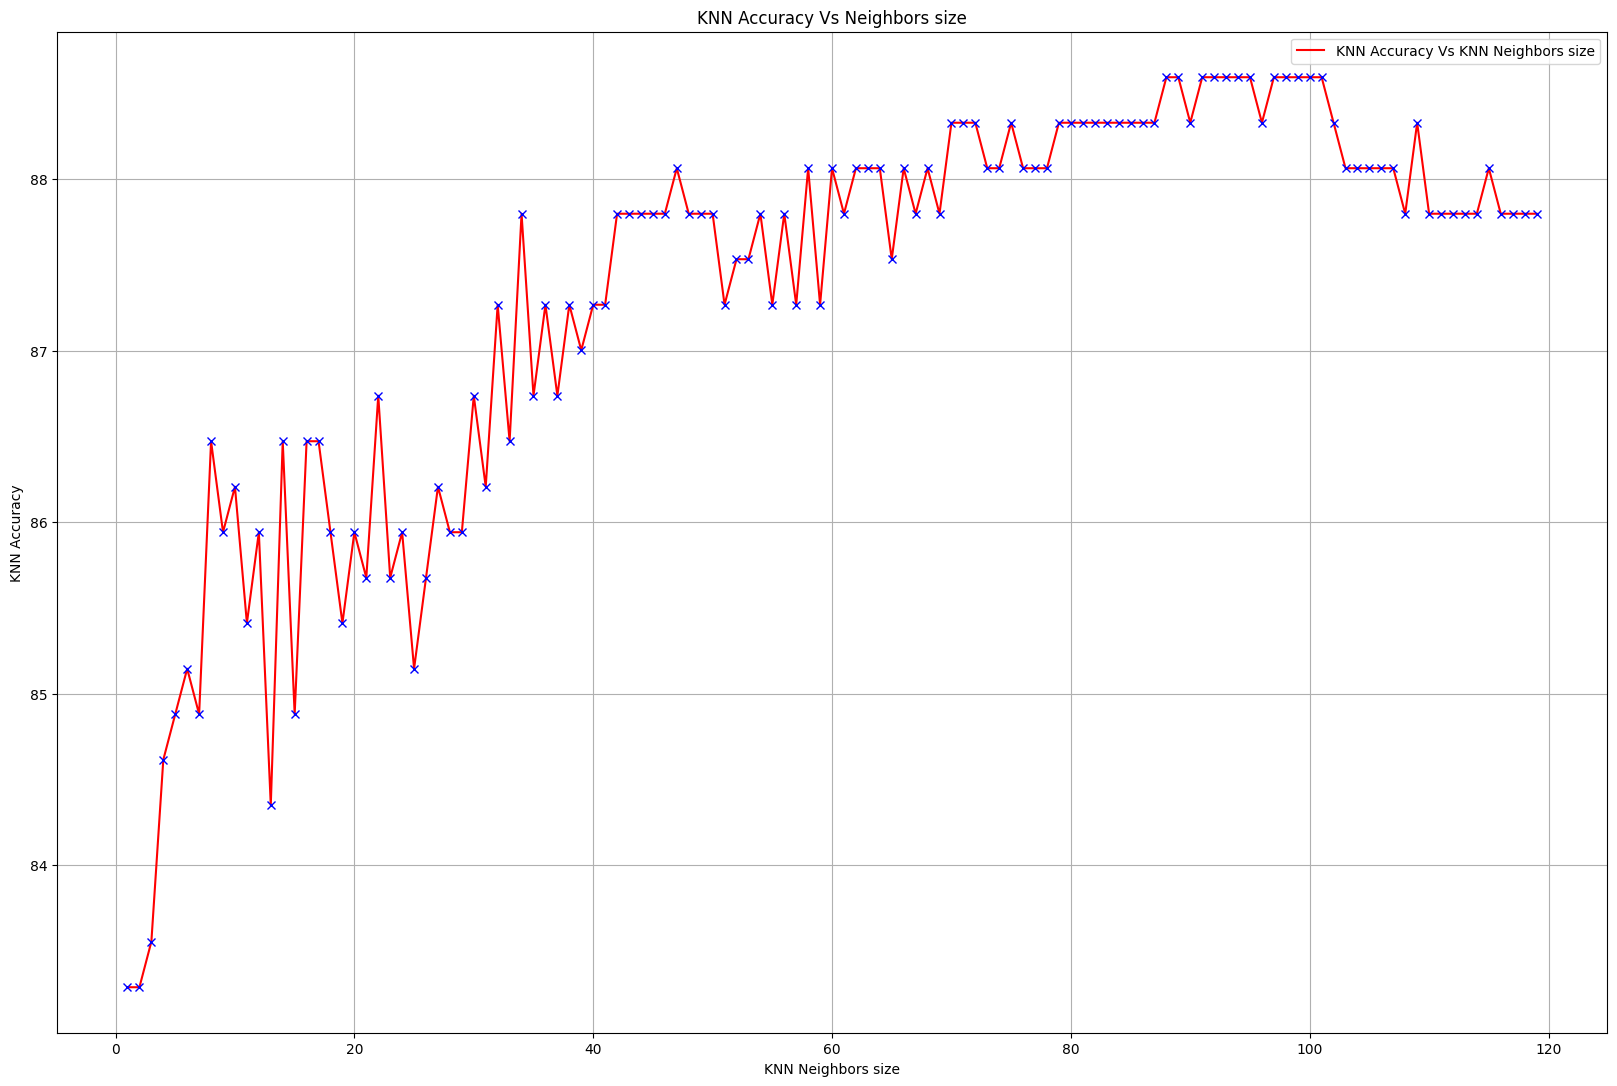

In [ ]:
import matplotlib.pyplot as plt
# Cros Validation for any of the features
k_range = np.arange(1,120)
accuracy = []
for n in k_range:
    neigh = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    #print ("Random Forest Classifer Result")
    #print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")
    accuracy.append(100*accuracy_score(y_pred, y_test))
plt.figure(figsize=(20,13))
plt.plot(k_range, accuracy, 'r-', label='KNN Accuracy Vs KNN Neighbors size')
plt.plot(k_range, accuracy, 'bx')
plt.xlabel('KNN Neighbors size')
plt.ylabel('KNN Accuracy')
plt.legend()
plt.grid()
plt.title('KNN Accuracy Vs Neighbors size')
plt.show()

In [ ]:
#Modified(table)
# defining the model
from sklearn.neighbors import KNeighborsClassifier

# Initialize an empty nested list to store accuracy values
accuracy_table = []

# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)
features_list = ['1 Features', '2 Features', '3 Features']
n_features = [1,2,3]
cluster1_accuracy = []  # Accuracy values for Cluster 1

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus1, X1.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X1.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster1_accuracy.append(accuracy)

accuracy_table.append(cluster1_accuracy)

# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)
cluster2_accuracy = []  # Accuracy values for Cluster 2

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus2, X2.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X2.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster2_accuracy.append(accuracy)

accuracy_table.append(cluster2_accuracy)

# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
cluster3_accuracy = []  # Accuracy values for Cluster 3

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus3, X3.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X3.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster3_accuracy.append(accuracy)

accuracy_table.append(cluster3_accuracy)

# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
cluster4_accuracy = []  # Accuracy values for Cluster 4

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus4, X4.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X4.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster4_accuracy.append(accuracy)

accuracy_table.append(cluster4_accuracy)

# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
cluster5_accuracy = []  # Accuracy values for Cluster 5
for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus5, X5.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X5.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster5_accuracy.append(accuracy)

accuracy_table.append(cluster5_accuracy)
# Print the accuracy table in tabular format
print("KNN(MI) \t1 Features\t2 Features\t3 Features")
for i in range(len(accuracy_table)):
    print(f"Cluster {i+1}\t{accuracy_table[i][0]:.2f}%\t\t{accuracy_table[i][1]:.2f}%\t\t{accuracy_table[i][2]:.2f}%")

KNN(MI) 	1 Features	2 Features	3 Features
Cluster 1	89.05%		87.97%		89.23%
Cluster 2	85.86%		86.65%		86.45%
Cluster 3	97.25%		97.25%		97.25%
Cluster 4	78.93%		80.60%		79.43%
Cluster 5	86.55%		86.90%		86.73%


In [ ]:
#Modified(table)
# Initialize an empty nested list to store accuracy values
accuracy_table = []

# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)
features_list = ['1 Features', '2 Features', '3 Features']
n_features = [1, 2, 3]
cluster1_accuracy = []  # Accuracy values for Cluster 1

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_1, X1.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X1.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster1_accuracy.append(accuracy)

accuracy_table.append(cluster1_accuracy)

# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)
cluster2_accuracy = []  # Accuracy values for Cluster 2

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_2, X2.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X2.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster2_accuracy.append(accuracy)

accuracy_table.append(cluster2_accuracy)

# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
cluster3_accuracy = []  # Accuracy values for Cluster 3

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_3, X3.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X3.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster3_accuracy.append(accuracy)

accuracy_table.append(cluster3_accuracy)

# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
cluster4_accuracy = []  # Accuracy values for Cluster 4

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_4, X4.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X4.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster4_accuracy.append(accuracy)

accuracy_table.append(cluster4_accuracy)

# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
cluster5_accuracy = []  # Accuracy values for Cluster 5
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_5, X5.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X5.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster5_accuracy.append(accuracy)

accuracy_table.append(cluster5_accuracy)
# Print the accuracy table in tabular format
print("KNN (F-score) \t1 Features\t2 Features\t3 Features")
for i in range(len(accuracy_table)):
    print(f"Cluster {i+1}\t{accuracy_table[i][0]:.2f}%\t\t{accuracy_table[i][1]:.2f}%\t\t{accuracy_table[i][2]:.2f}%")

KNN (F-score) 	1 Features	2 Features	3 Features
Cluster 1	89.05%		87.97%		89.23%
Cluster 2	85.86%		86.65%		86.45%
Cluster 3	97.25%		97.25%		97.25%
Cluster 4	78.93%		80.60%		79.43%
Cluster 5	86.55%		86.90%		86.73%


In [ ]:
#Modified(table)
# Initialize an empty nested list to store accuracy values
accuracy_table = []

# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)
features_list = ['1 Features', '2 Features', '3 Features']
n_features = [1, 2, 3]
cluster1_accuracy = []  # Accuracy values for Cluster 1

for i in range(len(features_list)):
    drop_these = list(set(X1.columns.values) - set(rfe_features_clus1[i]))
    data_clus_rfe = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster1_accuracy.append(accuracy)

accuracy_table.append(cluster1_accuracy)

# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)
cluster2_accuracy = []  # Accuracy values for Cluster 2

for i in range(len(features_list)):
    drop_these = list(set(X2.columns.values) - set(rfe_features_clus2[i]))
    data_clus_rfe = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster2_accuracy.append(accuracy)

accuracy_table.append(cluster2_accuracy)

# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
cluster3_accuracy = []  # Accuracy values for Cluster 3

for i in range(len(features_list)):
    drop_these = list(set(X3.columns.values) - set(rfe_features_clus3[i]))
    data_clus_rfe = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster3_accuracy.append(accuracy)

accuracy_table.append(cluster3_accuracy)

# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
cluster4_accuracy = []  # Accuracy values for Cluster 4

for i in range(len(features_list)):
    drop_these = list(set(X4.columns.values) - set(rfe_features_clus4[i]))
    data_clus_rfe = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster4_accuracy.append(accuracy)

accuracy_table.append(cluster4_accuracy)

# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
cluster5_accuracy = []  # Accuracy values for Cluster 5
for i in range(len(features_list)):
    drop_these = list(set(X5.columns.values) - set(rfe_features_clus5[i]))
    data_clus_rfe = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)
    neigh.fit(X_train, y_train)
    # predict the result
    y_pred = neigh.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster5_accuracy.append(accuracy)

accuracy_table.append(cluster5_accuracy)
# Print the accuracy table in tabular format
print("KNN (RFE) \t1 Features\t2 Features\t3 Features")
for i in range(len(accuracy_table)):
    print(f"Cluster {i+1}\t{accuracy_table[i][0]:.2f}%\t\t{accuracy_table[i][1]:.2f}%\t\t{accuracy_table[i][2]:.2f}%")

KNN (RFE) 	1 Features	2 Features	3 Features
Cluster 1	89.05%		87.97%		89.23%
Cluster 2	85.86%		86.06%		86.45%
Cluster 3	97.25%		97.25%		97.25%
Cluster 4	78.93%		80.43%		79.43%
Cluster 5	86.55%		86.90%		86.73%


In [ ]:
# Modifies (Table)
from sklearn.ensemble import RandomForestClassifier

# Initialize an empty nested list to store accuracy values
accuracy_table = []

# Random Forest - Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)
features_list = ['1 Features', '2 Features', '3 Features']
pca_data = [pca_clus1_1, pca_clus1_2, pca_clus1_3]
cluster1_accuracy = []  # Accuracy values for Cluster 1

for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster1_accuracy.append(accuracy)

accuracy_table.append(cluster1_accuracy)

# Random Forest - Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)
cluster2_accuracy = []  # Accuracy values for Cluster 2
pca_data = [pca_clus2_1, pca_clus2_2, pca_clus2_3]
for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster2_accuracy.append(accuracy)

accuracy_table.append(cluster2_accuracy)

# Random Forest - Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
cluster3_accuracy = []  # Accuracy values for Cluster 3
pca_data = [pca_clus3_1, pca_clus3_2, pca_clus3_3]
for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster3_accuracy.append(accuracy)

accuracy_table.append(cluster3_accuracy)

# Random Forest - Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
cluster4_accuracy = []  # Accuracy values for Cluster 4
pca_data = [pca_clus4_1, pca_clus4_2, pca_clus4_3]
for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster4_accuracy.append(accuracy)

accuracy_table.append(cluster4_accuracy)

# Random Forest - Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
cluster5_accuracy = []  # Accuracy values for Cluster 5
pca_data = [pca_clus5_1, pca_clus5_2, pca_clus5_3]
for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster5_accuracy.append(accuracy)

accuracy_table.append(cluster5_accuracy)

# Print the accuracy table in tabular format
print("RF(PCA)\t1 Features\t2 Features\t3 Features")
for i in range(len(accuracy_table)):
    print(f"Cluster {i+1}\t{accuracy_table[i][0]:.2f}%\t\t{accuracy_table[i][1]:.2f}%\t\t{accuracy_table[i][2]:.2f}%")

RF(PCA)	1 Features	2 Features	3 Features
Cluster 1	77.74%		84.38%		87.25%
Cluster 2	71.31%		81.67%		81.87%
Cluster 3	95.88%		97.45%		97.25%
Cluster 4	57.53%		76.09%		79.10%
Cluster 5	81.59%		85.84%		86.55%


In [ ]:
# Modifies (Table)
from sklearn.ensemble import RandomForestClassifier

# Initialize an empty nested list to store accuracy values
accuracy_table = []

# Random Forest - Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)
features_list = ['1 Features', '2 Features', '3 Features']
n_features = [1, 2, 3]
cluster1_accuracy = []  # Accuracy values for Cluster 1

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus1, X1.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X1.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=50, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster1_accuracy.append(accuracy)

accuracy_table.append(cluster1_accuracy)

# Random Forest - Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)
cluster2_accuracy = []  # Accuracy values for Cluster 2

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus2, X2.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X2.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=50, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster2_accuracy.append(accuracy)

accuracy_table.append(cluster2_accuracy)

# Random Forest - Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
cluster3_accuracy = []  # Accuracy values for Cluster 3

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus3, X3.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X3.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=50, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster3_accuracy.append(accuracy)

accuracy_table.append(cluster3_accuracy)

# Random Forest - Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
cluster4_accuracy = []  # Accuracy values for Cluster 4

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus4, X4.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X4.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=50, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster4_accuracy.append(accuracy)

accuracy_table.append(cluster4_accuracy)

# Random Forest - Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
cluster5_accuracy = []  # Accuracy values for Cluster 5

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus5, X5.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X5.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=50, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster5_accuracy.append(accuracy)

accuracy_table.append(cluster5_accuracy)

# Print the accuracy table in tabular format
print("RF (MI)\t1 Features\t2 Features\t3 Features")
for i in range(len(accuracy_table)):
    print(f"Cluster {i+1}\t{accuracy_table[i][0]:.2f}%\t\t{accuracy_table[i][1]:.2f}%\t\t{accuracy_table[i][2]:.2f}%")

RF (MI)	1 Features	2 Features	3 Features
Cluster 1	87.43%		85.10%		87.43%
Cluster 2	85.26%		83.86%		84.66%
Cluster 3	97.65%		98.04%		97.25%
Cluster 4	78.26%		76.76%		78.43%
Cluster 5	87.26%		86.19%		85.84%


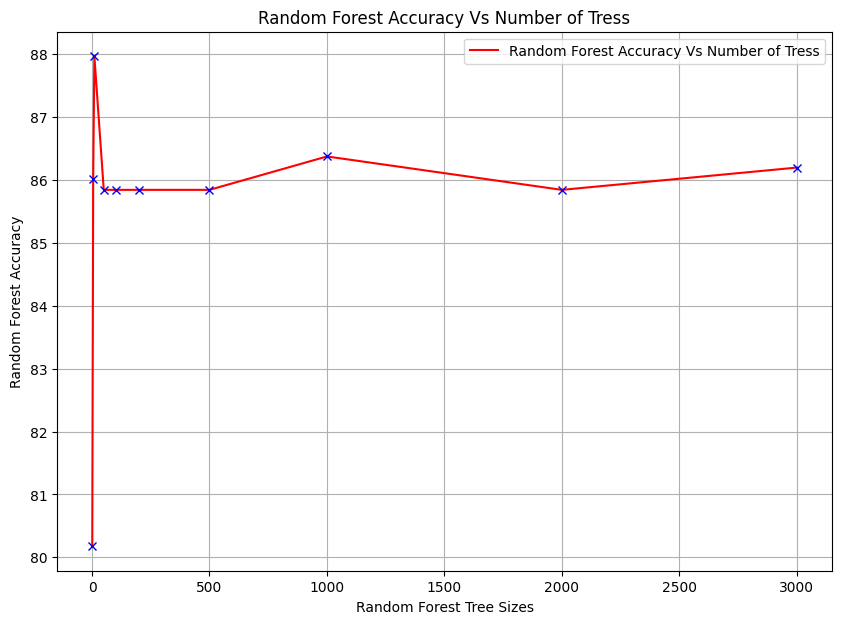

In [ ]:
#### Cross validation For Random Forest
nns = [1, 5, 10, 50, 100, 200, 500, 1000, 2000, 3000]
accuracy = []
for n in nns:
    clf = RandomForestClassifier(n_estimators=n, n_jobs=5, max_depth=500,
                                 random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    #print ("Random Forest Classifer Result")
    #print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")
    accuracy.append(100*accuracy_score(y_pred, y_test))
plt.figure(figsize=(10,7))
plt.plot(nns, accuracy, 'r-', label='Random Forest Accuracy Vs Number of Tress')
plt.plot(nns, accuracy, 'bx')
plt.xlabel('Random Forest Tree Sizes')
plt.ylabel('Random Forest Accuracy')
plt.legend()
plt.grid()
plt.title('Random Forest Accuracy Vs Number of Tress')
plt.show()

In [ ]:
# Modifies (Table)
from sklearn.ensemble import RandomForestClassifier

# Initialize an empty nested list to store accuracy values
accuracy_table = []

# Random Forest - Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)
features_list = ['1 Features', '2 Features', '3 Features']
n_features = [1, 2, 3]
cluster1_accuracy = []  # Accuracy values for Cluster 1

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_1, X1.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X1.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=40, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster1_accuracy.append(accuracy)

accuracy_table.append(cluster1_accuracy)

# Random Forest - Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)
cluster2_accuracy = []  # Accuracy values for Cluster 2

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_2, X2.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X2.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=40, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster2_accuracy.append(accuracy)

accuracy_table.append(cluster2_accuracy)

# Random Forest - Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
cluster3_accuracy = []  # Accuracy values for Cluster 3

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_3, X3.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X3.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=40, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster3_accuracy.append(accuracy)

accuracy_table.append(cluster3_accuracy)

# Random Forest - Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
cluster4_accuracy = []  # Accuracy values for Cluster 4

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_4, X4.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X4.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=40, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster4_accuracy.append(accuracy)

accuracy_table.append(cluster4_accuracy)

# Random Forest - Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
cluster5_accuracy = []  # Accuracy values for Cluster 5

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_5, X5.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X5.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=40, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster5_accuracy.append(accuracy)

accuracy_table.append(cluster5_accuracy)

# Print the accuracy table in tabular format
print("RF (F-Score)\t1 Features\t2 Features\t3 Features")
for i in range(len(accuracy_table)):
    print(f"Cluster {i+1}\t{accuracy_table[i][0]:.2f}%\t\t{accuracy_table[i][1]:.2f}%\t\t{accuracy_table[i][2]:.2f}%")

RF (F-Score)	1 Features	2 Features	3 Features
Cluster 1	87.43%		85.10%		87.43%
Cluster 2	85.26%		83.86%		84.66%
Cluster 3	97.65%		98.04%		97.25%
Cluster 4	78.26%		76.76%		78.43%
Cluster 5	87.26%		86.19%		85.84%


In [ ]:
# Modifies (Table)
from sklearn.ensemble import RandomForestClassifier

# Initialize an empty nested list to store accuracy values
accuracy_table = []

# Random Forest - Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)
features_list = ['1 Features', '2 Features', '3 Features']
n_features = [1, 2, 3]
cluster1_accuracy = []  # Accuracy values for Cluster 1
rfe_features_clus1 = [rfe_1_features_clus1, rfe_2_features_clus1, rfe_3_features_clus1]
for i in range(len(features_list)):
    # the features are stored in the second column
    drop_these = list(set(X1.columns.values) - set(rfe_features_clus1[i]))
    data_clus_rfe = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=40, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster1_accuracy.append(accuracy)

accuracy_table.append(cluster1_accuracy)

# Random Forest - Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)
cluster2_accuracy = []  # Accuracy values for Cluster 2
rfe_features_clus1 = [rfe_1_features_clus2, rfe_2_features_clus2, rfe_3_features_clus3]
for i in range(len(features_list)):
    # the features are stored in the second column
    drop_these = list(set(X2.columns.values) - set(rfe_features_clus1[i]))
    data_clus_rfe = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=40, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster2_accuracy.append(accuracy)

accuracy_table.append(cluster2_accuracy)

# Random Forest - Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
cluster3_accuracy = []  # Accuracy values for Cluster 3
rfe_features_clus1 = [rfe_1_features_clus3, rfe_2_features_clus3, rfe_3_features_clus3]
for i in range(len(features_list)):
    # the features are stored in the second column
    drop_these = list(set(X3.columns.values) - set(rfe_features_clus1[i]))
    data_clus_rfe = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=40, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster3_accuracy.append(accuracy)

accuracy_table.append(cluster3_accuracy)

# Random Forest - Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
cluster4_accuracy = []  # Accuracy values for Cluster 4
rfe_features_clus1 = [rfe_1_features_clus4, rfe_2_features_clus4, rfe_3_features_clus4]
for i in range(len(features_list)):
    # the features are stored in the second column
    drop_these = list(set(X4.columns.values) - set(rfe_features_clus1[i]))
    data_clus_rfe = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=40, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster4_accuracy.append(accuracy)

accuracy_table.append(cluster4_accuracy)

# Random Forest - Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
cluster5_accuracy = []  # Accuracy values for Cluster 5
rfe_features_clus1 = [rfe_1_features_clus5, rfe_2_features_clus5, rfe_3_features_clus5]
for i in range(len(features_list)):
    # the features are stored in the second column
    drop_these = list(set(X5.columns.values) - set(rfe_features_clus1[i]))
    data_clus_rfe = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    clf = RandomForestClassifier(n_estimators=650, n_jobs=5, max_depth=40, random_state=0)
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster5_accuracy.append(accuracy)

accuracy_table.append(cluster5_accuracy)

# Print the accuracy table in tabular format
print("RF (RFE)\t1 Features\t2 Features\t3 Features")
for i in range(len(accuracy_table)):
    print(f"Cluster {i+1}\t{accuracy_table[i][0]:.2f}%\t\t{accuracy_table[i][1]:.2f}%\t\t{accuracy_table[i][2]:.2f}%")

RF (RFE)	1 Features	2 Features	3 Features
Cluster 1	87.43%		85.10%		87.43%
Cluster 2	85.26%		82.27%		84.66%
Cluster 3	97.65%		97.45%		97.25%
Cluster 4	78.26%		76.25%		78.43%
Cluster 5	87.26%		86.19%		85.84%


In [ ]:
# SVM
#### RFE
from sklearn.svm import SVC

In [ ]:
# Modified (table)
from sklearn.svm import SVC

# Initialize an empty nested list to store accuracy values
accuracy_table = []

# SVM - Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)
features_list = ['1 Features', '2 Features', '3 Features']
n_features = [1, 2, 3]
rfe_features_clus1 = [rfe_1_features_clus1, rfe_2_features_clus1, rfe_3_features_clus1]
cluster1_accuracy = []  # Accuracy values for Cluster 1

for i in range(len(features_list)):
    # the features are stored in the second column
    drop_these = list(set(X1.columns.values) - set(rfe_features_clus1[i]))
    data_clus_rfe = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster1_accuracy.append(accuracy)

accuracy_table.append(cluster1_accuracy)

# SVM - Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)
rfe_features_clus2 = [rfe_1_features_clus2, rfe_2_features_clus2, rfe_3_features_clus2]
cluster2_accuracy = []  # Accuracy values for Cluster 2

for i in range(len(features_list)):
    # the features are stored in the second column
    drop_these = list(set(X2.columns.values) - set(rfe_features_clus2[i]))
    data_clus_rfe = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster2_accuracy.append(accuracy)

accuracy_table.append(cluster2_accuracy)

# SVM - Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
rfe_features_clus3 = [rfe_1_features_clus3, rfe_2_features_clus3, rfe_3_features_clus3]
cluster3_accuracy = []  # Accuracy values for Cluster 3

for i in range(len(features_list)):
    # the features are stored in the second column
    drop_these = list(set(X3.columns.values) - set(rfe_features_clus3[i]))
    data_clus_rfe = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster3_accuracy.append(accuracy)

accuracy_table.append(cluster3_accuracy)

# SVM - Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
rfe_features_clus4 = [rfe_1_features_clus4, rfe_2_features_clus4, rfe_3_features_clus4]
cluster4_accuracy = []  # Accuracy values for Cluster 4

for i in range(len(features_list)):
    # the features are stored in the second column
    drop_these = list(set(X4.columns.values) - set(rfe_features_clus4[i]))
    data_clus_rfe = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster4_accuracy.append(accuracy)

accuracy_table.append(cluster4_accuracy)

# SVM - Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
rfe_features_clus5 = [rfe_1_features_clus5, rfe_2_features_clus5, rfe_3_features_clus5]
cluster5_accuracy = []  # Accuracy values for Cluster 5

for i in range(len(features_list)):
    # the features are stored in the second column
    drop_these = list(set(X5.columns.values) - set(rfe_features_clus5[i]))
    data_clus_rfe = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster5_accuracy.append(accuracy)

accuracy_table.append(cluster5_accuracy)

# Print the accuracy table in tabular format
print("SVM (RFE) \t1 Features\t2 Features\t3 Features")
for i in range(len(accuracy_table)):
    print(f"Cluster {i+1}\t{accuracy_table[i][0]:.2f}%\t\t{accuracy_table[i][1]:.2f}%\t\t{accuracy_table[i][2]:.2f}%")

SVM (RFE) 	1 Features	2 Features	3 Features
Cluster 1	87.97%		87.97%		87.97%
Cluster 2	86.06%		86.45%		85.66%
Cluster 3	97.25%		97.25%		97.25%
Cluster 4	80.27%		79.60%		79.77%
Cluster 5	85.84%		87.96%		87.79%


In [ ]:
# Modified (table)
from sklearn.svm import SVC

# Initialize an empty nested list to store accuracy values
accuracy_table = []

# SVM - Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)
features_list = ['1 Features', '2 Features', '3 Features']
pca_data = [pca_clus1_1, pca_clus1_2, pca_clus1_3]
cluster1_accuracy = []  # Accuracy values for Cluster 1

for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster1_accuracy.append(accuracy)

accuracy_table.append(cluster1_accuracy)

# SVM - Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)
pca_data = [pca_clus2_1, pca_clus2_2, pca_clus2_3]
cluster2_accuracy = []  # Accuracy values for Cluster 2

for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster2_accuracy.append(accuracy)

accuracy_table.append(cluster2_accuracy)

# SVM - Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
pca_data = [pca_clus3_1, pca_clus3_2, pca_clus3_3]
cluster3_accuracy = []  # Accuracy values for Cluster 3

for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster3_accuracy.append(accuracy)

accuracy_table.append(cluster3_accuracy)

# SVM - Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
pca_data = [pca_clus4_1, pca_clus4_2, pca_clus4_3]
cluster4_accuracy = []  # Accuracy values for Cluster 4

for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster4_accuracy.append(accuracy)

accuracy_table.append(cluster4_accuracy)

# SVM - Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
pca_data = [pca_clus5_1, pca_clus5_2, pca_clus5_3]
cluster5_accuracy = []  # Accuracy values for Cluster 5

for i in range(len(pca_data)):
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster5_accuracy.append(accuracy)

accuracy_table.append(cluster5_accuracy)

# Print the accuracy table in tabular format
print("SVM (PCA) \t1 Features\t2 Features\t3 Features")
for i in range(len(accuracy_table)):
    print(f"Cluster {i+1}\t{accuracy_table[i][0]:.2f}%\t\t{accuracy_table[i][1]:.2f}%\t\t{accuracy_table[i][2]:.2f}%")

SVM (PCA) 	1 Features	2 Features	3 Features
Cluster 1	87.97%		87.97%		87.97%
Cluster 2	83.27%		83.27%		85.66%
Cluster 3	97.25%		97.25%		97.25%
Cluster 4	66.22%		79.43%		79.77%
Cluster 5	87.43%		86.90%		87.79%


In [ ]:
# Modified (table)
from sklearn.svm import SVC

# Initialize an empty nested list to store accuracy values
accuracy_table = []

# SVM - Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)
features_list = ['1 Features', '2 Features', '3 Features']
n_features = [1, 2, 3]
cluster1_accuracy = []  # Accuracy values for Cluster 1

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus1, X1.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X1.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster1_accuracy.append(accuracy)

accuracy_table.append(cluster1_accuracy)

# SVM - Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)
cluster2_accuracy = []  # Accuracy values for Cluster 2

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus2, X2.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X2.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster2_accuracy.append(accuracy)

accuracy_table.append(cluster2_accuracy)

# SVM - Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
cluster3_accuracy = []  # Accuracy values for Cluster 3

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus3, X3.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X3.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster3_accuracy.append(accuracy)

accuracy_table.append(cluster3_accuracy)

# SVM - Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
cluster4_accuracy = []  # Accuracy values for Cluster 4

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus4, X4.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X4.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster4_accuracy.append(accuracy)

accuracy_table.append(cluster4_accuracy)

# SVM - Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
cluster5_accuracy = []  # Accuracy values for Cluster 5

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus5, X5.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X5.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster5_accuracy.append(accuracy)

accuracy_table.append(cluster5_accuracy)

# Print the accuracy table in tabular format
print("SVM (MI) \t1 Features\t2 Features\t3 Features")
for i in range(len(accuracy_table)):
    print(f"Cluster {i+1}\t{accuracy_table[i][0]:.2f}%\t\t{accuracy_table[i][1]:.2f}%\t\t{accuracy_table[i][2]:.2f}%")

SVM (MI) 	1 Features	2 Features	3 Features
Cluster 1	87.97%		87.97%		87.97%
Cluster 2	86.06%		85.86%		85.66%
Cluster 3	97.25%		97.25%		97.25%
Cluster 4	80.27%		79.43%		79.77%
Cluster 5	85.84%		87.96%		87.79%


In [ ]:
# Modified (table)
from sklearn.svm import SVC

# Initialize an empty nested list to store accuracy values
accuracy_table = []

# SVM - Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)
features_list = ['1 Features', '2 Features', '3 Features']
n_features = [1, 2, 3]
cluster1_accuracy = []  # Accuracy values for Cluster 1

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_1, X1.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X1.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster1_accuracy.append(accuracy)

accuracy_table.append(cluster1_accuracy)

# SVM - Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)
cluster2_accuracy = []  # Accuracy values for Cluster 2

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_2, X2.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X2.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster2_accuracy.append(accuracy)

accuracy_table.append(cluster2_accuracy)

# SVM - Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
cluster3_accuracy = []  # Accuracy values for Cluster 3

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_3, X3.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X3.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster3_accuracy.append(accuracy)

accuracy_table.append(cluster3_accuracy)

# SVM - Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
cluster4_accuracy = []  # Accuracy values for Cluster 4

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_4, X4.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X4.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster4_accuracy.append(accuracy)

accuracy_table.append(cluster4_accuracy)

# SVM - Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
cluster5_accuracy = []  # Accuracy values for Cluster 5

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_5, X5.columns.values, n=n_features[i])
    # the features are stored in the second column
    drop_these = list(set(X5.columns.values) - set(best_features[:, 1]))
    data_clus_mi = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.3, shuffle=False)
    clf = SVC(gamma='auto')
    clf.fit(X_train, y_train)
    # predict the result
    y_pred = clf.predict(X_test)
    accuracy = 100 * accuracy_score(y_pred, y_test)
    cluster5_accuracy.append(accuracy)

accuracy_table.append(cluster5_accuracy)

# Print the accuracy table in tabular format
print("SVM(F-Score) \t1 Features\t2 Features\t3 Features")
for i in range(len(accuracy_table)):
    print(f"Cluster {i+1}\t{accuracy_table[i][0]:.2f}%\t\t{accuracy_table[i][1]:.2f}%\t\t{accuracy_table[i][2]:.2f}%")

SVM(F-Score) 	1 Features	2 Features	3 Features
Cluster 1	87.97%		87.97%		87.97%
Cluster 2	86.06%		85.86%		85.66%
Cluster 3	97.25%		97.25%		97.25%
Cluster 4	80.27%		79.43%		79.77%
Cluster 5	85.84%		87.96%		87.79%
